In [ ]:
pip install opencv-python ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from glob import glob
import random
import ipyplot
from matplotlib import pyplot as plt 


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [ ]:
base_path = "/content/drive/MyDrive/laborator_cv1/"
file_list =[]
for i in range(4):
  one_class_folder = glob(base_path+str(i)+"/*.jpg")
  file_list.append(one_class_folder)

  print(file_list) #printam ce poze am gasit



[['/content/drive/MyDrive/laborator_cv1/0/0.jpg', '/content/drive/MyDrive/laborator_cv1/0/1.jpg', '/content/drive/MyDrive/laborator_cv1/0/2.jpg', '/content/drive/MyDrive/laborator_cv1/0/3.jpg', '/content/drive/MyDrive/laborator_cv1/0/4.jpg', '/content/drive/MyDrive/laborator_cv1/0/5.jpg', '/content/drive/MyDrive/laborator_cv1/0/6.jpg', '/content/drive/MyDrive/laborator_cv1/0/7.jpg', '/content/drive/MyDrive/laborator_cv1/0/8.jpg', '/content/drive/MyDrive/laborator_cv1/0/9.jpg']]
[['/content/drive/MyDrive/laborator_cv1/0/0.jpg', '/content/drive/MyDrive/laborator_cv1/0/1.jpg', '/content/drive/MyDrive/laborator_cv1/0/2.jpg', '/content/drive/MyDrive/laborator_cv1/0/3.jpg', '/content/drive/MyDrive/laborator_cv1/0/4.jpg', '/content/drive/MyDrive/laborator_cv1/0/5.jpg', '/content/drive/MyDrive/laborator_cv1/0/6.jpg', '/content/drive/MyDrive/laborator_cv1/0/7.jpg', '/content/drive/MyDrive/laborator_cv1/0/8.jpg', '/content/drive/MyDrive/laborator_cv1/0/9.jpg'], ['/content/drive/MyDrive/laborator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
random.seed(42)
indexes = random.sample(range(0,9), 7)
print(indexes)

[1, 0, 5, 2, 8, 4, 7]


In [ ]:
train_files = []
test_files = []
for f in file_list:
  t = []
  for el in indexes:
    t.append(f[el])
  train_files.append(t)
  test_files.append([x for x in f if x not in t])

print(test_files)
print(np.shape(train_files))
print(np.shape(test_files))

[['/content/drive/MyDrive/laborator_cv1/0/3.jpg', '/content/drive/MyDrive/laborator_cv1/0/6.jpg', '/content/drive/MyDrive/laborator_cv1/0/9.jpg'], ['/content/drive/MyDrive/laborator_cv1/1/3.jpg', '/content/drive/MyDrive/laborator_cv1/1/6.jpg', '/content/drive/MyDrive/laborator_cv1/1/9.jpg'], ['/content/drive/MyDrive/laborator_cv1/2/3.jpg', '/content/drive/MyDrive/laborator_cv1/2/6.jpg', '/content/drive/MyDrive/laborator_cv1/2/9.jpg'], ['/content/drive/MyDrive/laborator_cv1/3/3.jpg', '/content/drive/MyDrive/laborator_cv1/3/6.jpg', '/content/drive/MyDrive/laborator_cv1/3/9.jpg']]
(4, 7)
(4, 3)


TypeError: ignored

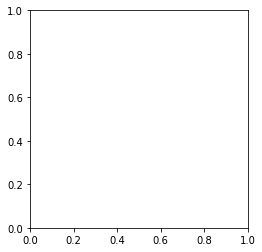

In [ ]:
from google.colab.patches import cv2_imshow
im = cv2.imread('/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg')
#cv2.imshow("sh", im)
#cv2_imshow(im) # ATENTIE LA SPATIILE DE CULOARE>>>AU AUTOMATIZAT CONVERSIA
#ipyplot.plot_images(im)#, max_images = 1, img_width= 456)
plt.imshow(im)


[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]


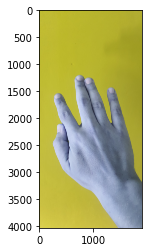

In [ ]:
#aici incarcam toate imaginile intr-o listuta ca obiecte de cv2
test_img = [cv2.imread(img) for folder in test_files for img in folder]
train_img = [cv2.imread(img) for folder in train_files for img in folder]
test_labels = [int(img.split("/")[-2]) for folder in test_files for img in folder]
train_labels = [int(img.split("/")[-2]) for folder in train_files for img in folder]
plt.imshow(train_img[0])
print(test_labels)

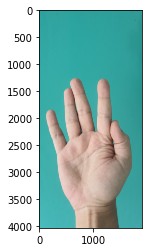

In [ ]:
def bgr_to_rgb(img):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img_rgb

test_img_col = list(map(bgr_to_rgb, test_img)) #aplica functia bgr_to_rgb la toatet img din test_img
train_img_col = list(map(bgr_to_rgb, train_img))

plt.imshow(test_img_col[0])

In [ ]:
# IMAGINEA ESTE CITITA IN BGR SI TREBUIE SCHIMBAT SPATIUL DE CULOARE!
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
print(np.shape(im_rgb))

error: ignored

In [ ]:
im_rgb_small = cv2.resize(im_rgb,(int(im_rgb.shape[1] *0.2), int(im_rgb.shape[0] * 0.2)))
im_rgb_small = cv2.blur(im_rgb_small, (7,7))
plt.imshow(im_rgb_small)
print(np.shape(im_rgb_small))

NameError: ignored

(4032, 1908, 3)
(806, 381, 3)


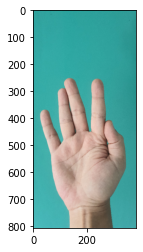

In [ ]:
def resize(img):
  img_resize = cv2.resize(img,(int(img.shape[1] *0.2), int(img.shape[0] * 0.2)))
  return img_resize

test_img_col_res = list(map(resize, test_img_col)) #aplicam resize
train_img_col_res = list(map(resize, train_img_col))

plt.imshow(test_img_col_res[0])
print(test_img_col[0].shape)
print(test_img_col_res[0].shape)

In [ ]:
color = ('r', 'g', 'b')
for i, col in enumerate(color):
  hist = cv2.calcHist([im_rgb_small], [i],None, [256], [0, 256])
  plt.plot(hist, color =col)
  plt.xlim([0,256])
plt.show()

NameError: ignored

In [ ]:
mask = im_rgb_small[...,0]>150
plt.imshow(mask)


NameError: ignored

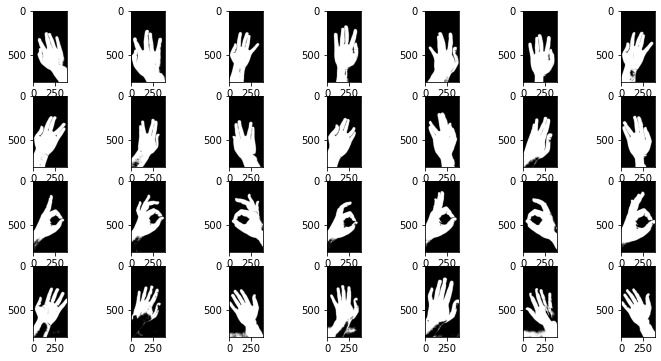

In [ ]:
def hand_mask(img):

  mask = img[...,0]>95
  mask[mask>0] = 255
  return mask

test_img_col_res_mask = list(map(hand_mask, test_img_col_res)) #aplicam resize
train_img_col_res_mask = list(map(hand_mask, train_img_col_res))



fig, ax = plt.subplots(4, 7, figsize=(12, 6))


for i in range(4):
  for j in range(7):
    ax[i][j].imshow(train_img_col_res_mask[i*7 + j], cmap="gray")

plt.show()
plt.show()

In [ ]:
print(im_rgb_small[0,0,:])

NameError: ignored

In [ ]:
# culoare asemanatoare
def sim_col(v):
  if abs(v[0] - 46) < 70 and abs(v[1] - 163) < 70 and abs(v[2] - 157) < 70:
    return (0,0,0)
  return (255,255,255)


In [ ]:
mask2 = im_rgb_small.copy()
for i in range(im_rgb_small.shape[1]):
  for j in range(im_rgb_small.shape[0]):
     mask2[j,i] = sim_col(im_rgb_small[j,i])
plt.imshow(mask2)

NameError: ignored

In [ ]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

gray = cv2.cvtColor(im_rgb_small, cv2.COLOR_BGR2GRAY) #IMAGINEA IN GRAYSCALE
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT) #SOBEl PE X
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT) #SOBEl PE Y

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.imshow(grad)


NameError: ignored

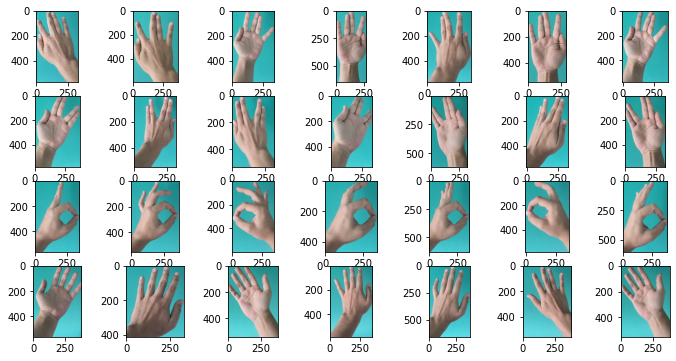

In [ ]:



def hand_contour(img, img_orig):
  contur, _ = cv2.findContours(img.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  arie_max = 0
  rect_max = np.array([0, 0, 0, 0])
  for i in contur:
    temp = cv2.boundingRect(i)
    if temp[2]*temp[3] > arie_max: #temp[2]*temp[3] este aria rect (rect = (x, y, w, h))
      arie_max = temp[2] * temp[3]
      rect_max = temp
    
  return crop_img(img, rect_max), crop_img(img_orig, rect_max) #aplic cropare


def crop_img(img, rect):
  #taiere matrici
  return img[ rect[1]:(rect[1]+rect[3]), rect[0]:(rect[0] + rect[2])] #itereaza prin matrice ptr crop

test_packed = list(map(hand_contour, test_img_col_res_mask, test_img_col_res )) 
train_packed = list(map(hand_contour, train_img_col_res_mask, train_img_col_res))


#unpacking urat ignorati
test_contours = [i[0] for i in test_packed]
test_orig_crop = [i[1] for i in test_packed]
train_contours = [i[0] for i in train_packed]
train_orig_crop = [i[1] for i in train_packed]


fig, ax = plt.subplots(4, 7, figsize=(12, 6))


for i in range(4):
  for j in range(7):
    ax[i][j].imshow(train_orig_crop[i*7 + j])

plt.show()

In [ ]:

winSize = (64,64)
blockSize = (16,16)
blockStride = (16,16)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(train_orig_crop[0],winStride,padding,locations)




print(hist.shape, train_orig_crop[0].shape)

(576,) (566, 331, 3)


In [ ]:
566*331 / 566

331.0

In [ ]:
#resize imagini la aceeasi dimensiune extragere trasaturi vectori
#consiliu intre noi cine vrea sa prezinte trebe pregatit mediu
#clonat repo si montat si descarcat imaginile
#